# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [3]:
# Usando 'r' (raw string) para que Python trate as barras invertidas do Windows literalmente.
caminho_arquivo = r"C:\Users\NOTE\Desktop\Agregaçoes em Python\Profissão Cientista de Dados M9 A1 - SINASC_RO_2019 (1).csv"

# Carregamento do DataFrame
sinasc_raw = pd.read_csv(caminho_arquivo)

# Exibe as primeiras linhas para confirmar que o carregamento deu certo.
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [6]:
# Caminho corrigido com r-string
caminho_arquivo = r"C:\Users\NOTE\Desktop\Agregaçoes em Python\Profissão Cientista de Dados M9 A1 - SINASC_RO_2019 (1).csv"
sinasc_raw = pd.read_csv(caminho_arquivo)

# Seleção de colunas necessárias e CRIAÇÃO DA CÓPIA PRINCIPAL (sinasc_analise)
colunas_chave = ['munResLat', 'APGAR5', 'QTDPARTCES']
sinasc_analise = sinasc_raw[colunas_chave].copy()

# Exibe o início do novo DataFrame de trabalho.
print(sinasc_analise.head())

   munResLat  APGAR5  QTDPARTCES
0  -11.93554    10.0         0.0
1  -11.93554     9.0         1.0
2  -11.93554    10.0         1.0
3  -12.13178    10.0         0.0
4  -11.93554    10.0         1.0


In [8]:
sinasc_limpo = sinasc_analise.dropna().copy()

# 2. Converte APGAR5 e QTDPARTCES para tipo inteiro (agora sem o SettingWithCopyWarning)
sinasc_limpo['APGAR5'] = sinasc_limpo['APGAR5'].astype(int)
sinasc_limpo['QTDPARTCES'] = sinasc_limpo['QTDPARTCES'].astype(int)

# Exibe a contagem de registros após a limpeza
print(f"Número de registros após a remoção de NaNs: {len(sinasc_limpo)}")

Número de registros após a remoção de NaNs: 25142


In [9]:
# Criação da Faixa de Latitude usando o ponto de corte -10.5
faixa_lat = sinasc_limpo['munResLat'].apply(
    lambda x: 'Acima de -10.5 (Norte)' if x > -10.5 else 'Abaixo de -10.5 (Sul)'
)

# Adiciona a nova coluna de faixas ao DataFrame limpo
# .loc para garantir que a atribuição seja feita corretamente e evitar futuros avisos
sinasc_limpo.loc[:, 'FaixaLatitude'] = faixa_lat

# Exibe a contagem de nascimentos por faixa para conferência
print("\nContagem de Nascimentos por Faixa de Latitude:")
print(sinasc_limpo['FaixaLatitude'].value_counts())


Contagem de Nascimentos por Faixa de Latitude:
FaixaLatitude
Abaixo de -10.5 (Sul)     12803
Acima de -10.5 (Norte)    12339
Name: count, dtype: int64


In [10]:
funcoes_agg = ['sum', 'mean', 'min', 'max', 'median', 'std', 'var']

# Dicionário de agregação: aplica o conjunto de funções a ambas as variáveis
agg_dict = {'APGAR5': funcoes_agg, 
            'QTDPARTCES': funcoes_agg}

# Aplica o groupby na FaixaLatitude e realiza as agregações
resumo_lat = sinasc_limpo.groupby('FaixaLatitude').agg(agg_dict)

# Exibe o resultado final do exercício
print("\n--- Resultado Final do Exercício 3 ---")
print(resumo_lat)


--- Resultado Final do Exercício 3 ---
                        APGAR5                                               \
                           sum      mean min max median       std       var   
FaixaLatitude                                                                 
Abaixo de -10.5 (Sul)   117013  9.139499   0  10    9.0  0.794787  0.631687   
Acima de -10.5 (Norte)  113596  9.206257   0  10    9.0  0.782678  0.612585   

                       QTDPARTCES                                               
                              sum      mean min max median       std       var  
FaixaLatitude                                                                   
Abaixo de -10.5 (Sul)        7088  0.553620   0  12    0.0  0.753575  0.567875  
Acima de -10.5 (Norte)       6032  0.488856   0  12    0.0  0.738406  0.545244  


### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [12]:
# Colunas necessárias: a chave de agrupamento (munResArea) e as novas variáveis numéricas
colunas_chave_ex4 = ['munResArea', 'QTDPARTNOR', 'CONSULTAS']

# 1. Cria um novo DataFrame focado nessas colunas, garantindo que é uma cópia independente
sinasc_area_analise = sinasc_raw[colunas_chave_ex4].copy()

# 2. Remove as linhas que contenham qualquer NaN nessas colunas
# Usamos .copy() novamente para garantir que 'sinasc_limpo_ex4' seja um DataFrame principal
sinasc_limpo_ex4 = sinasc_area_analise.dropna().copy()

# 3. Conversão de Tipo para Inteiro
sinasc_limpo_ex4['QTDPARTNOR'] = sinasc_limpo_ex4['QTDPARTNOR'].astype(int)
sinasc_limpo_ex4['CONSULTAS'] = sinasc_limpo_ex4['CONSULTAS'].astype(int)

In [14]:
# --- Recriação da Faixa de Área (Passo 2) ---
# Criação da Faixa de Área usando o ponto de corte 3000
faixa_area = sinasc_limpo_ex4['munResArea'].apply(
    lambda x: 'Acima de 3000 km² (Grandes)' if x > 3000 else 'Abaixo de 3000 km² (Pequenos/Médios)'
)

# Adiciona a nova coluna de faixas ao DataFrame
sinasc_limpo_ex4.loc[:, 'FaixaArea'] = faixa_area


# --- Aplicação do Groupby e Agregações (Passo 3) ---
funcoes_agg = ['sum', 'mean', 'min', 'max', 'median', 'std', 'var']

agg_dict_ex4 = {'QTDPARTNOR': funcoes_agg, 
                'CONSULTAS': funcoes_agg}

# Aplica o groupby e a agregação
resumo_area = sinasc_limpo_ex4.groupby('FaixaArea').agg(agg_dict_ex4)

# Exibe o resultado final do exercício
print("\n--- Resultado Final do Exercício 4 ---")
print(resumo_area)


--- Resultado Final do Exercício 4 ---
                                     QTDPARTNOR                           \
                                            sum      mean min max median   
FaixaArea                                                                  
Abaixo de 3000 km² (Pequenos/Médios)       1912  0.371334   0  10    0.0   
Acima de 3000 km² (Grandes)               12659  0.632982   0  41    0.0   

                                                         CONSULTAS            \
                                           std       var       sum      mean   
FaixaArea                                                                      
Abaixo de 3000 km² (Pequenos/Médios)  0.856441  0.733490     19264  3.741309   
Acima de 3000 km² (Grandes)           1.278932  1.635668     70865  3.543427   

                                                                         
                                     min max median       std       var  
FaixaArea                     

### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [16]:
# Imprime todas as colunas disponíveis no DataFrame sinasc_raw
print(sinasc_raw.columns.tolist())

['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE', 'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES', 'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC', 'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO', 'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA', 'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010', 'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR', 'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM', 'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO', 'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1', 'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE', 'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome', 'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea']


In [18]:
colunas_chave_ex6_corr = ['munResAlt', 'QTDFILMORT', 'PESO']

# 1. Cria um novo DataFrame focado nessas colunas, garantindo que é uma cópia independente
sinasc_alt_analise = sinasc_raw[colunas_chave_ex6_corr].copy()

# 2. Remove as linhas com NaN nessas colunas e cria uma cópia segura
sinasc_limpo_ex6 = sinasc_alt_analise.dropna().copy()

# 3. Conversão de Tipo para Inteiro
sinasc_limpo_ex6.loc[:, 'QTDFILMORT'] = sinasc_limpo_ex6['QTDFILMORT'].astype(int)
sinasc_limpo_ex6.loc[:, 'PESO'] = sinasc_limpo_ex6['PESO'].astype(int)

# Exibe as primeiras linhas do DataFrame limpo para conferência.
print(sinasc_limpo_ex6.head())

   munResAlt  QTDFILMORT  PESO
0      338.0         0.0  3685
1      338.0         0.0  3055
2      338.0         0.0  3460
3      397.0         0.0  2982
4      338.0         0.0  3310


### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia


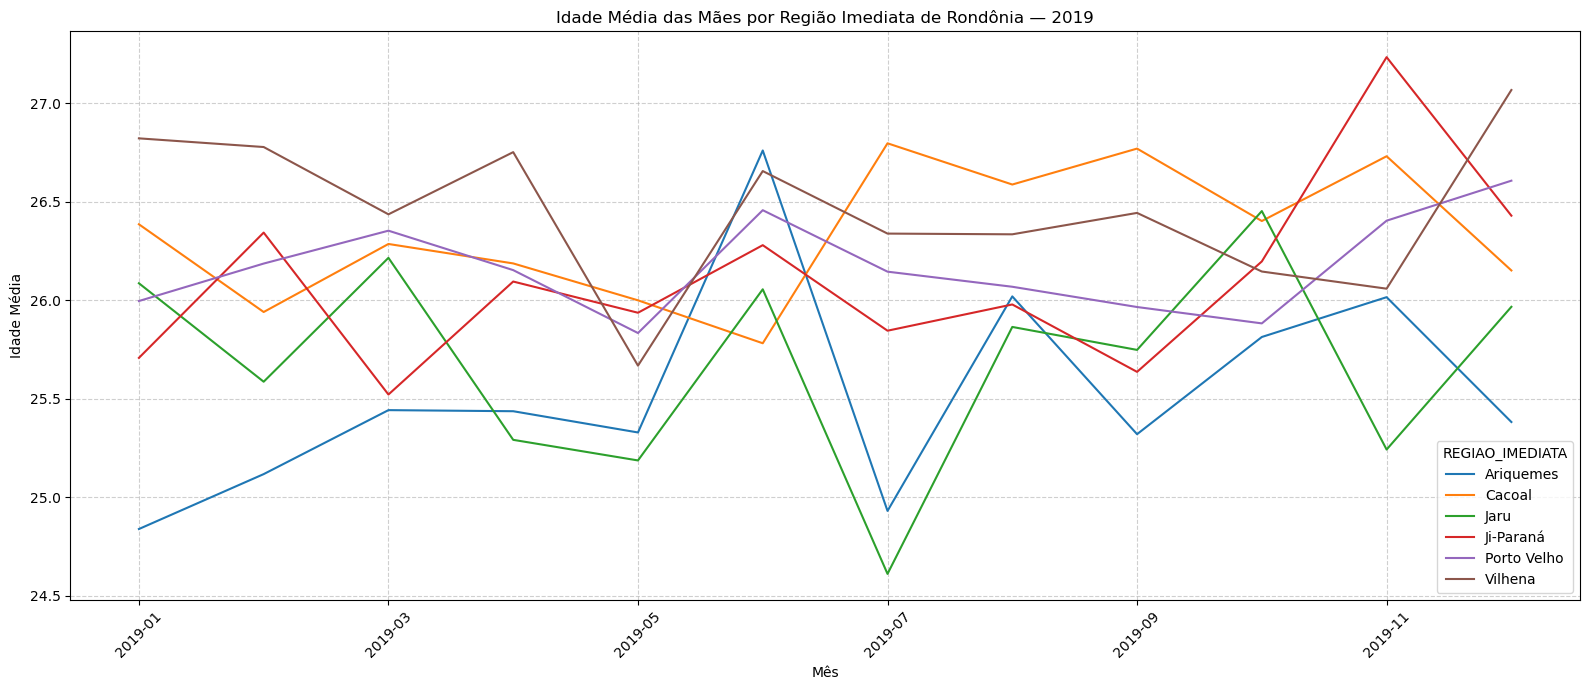

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# === 1. Caminho correto do arquivo ===
caminho_arquivo = r"C:\Users\NOTE\Desktop\Agregaçoes em Python\Profissão Cientista de Dados M9 A1 - SINASC_RO_2019 (1).csv"

# Carregar o CSV
sinasc = pd.read_csv(caminho_arquivo, low_memory=False)

# === 2. Coluna município ===
COL_MUNICIPIO = "munResNome"

# === 3. Dicionário das regiões imediatas de Rondônia ===
regioes_imediatas = {
    "Alta Floresta D'Oeste": "Cacoal",
    "Alto Alegre dos Parecis": "Cacoal",
    "Alvorada D'Oeste": "Ji-Paraná",
    "Ariquemes": "Ariquemes",
    "Buritis": "Ariquemes",
    "Cacoal": "Cacoal",
    "Candeias do Jamari": "Porto Velho",
    "Castanheiras": "Cacoal",
    "Cerejeiras": "Vilhena",
    "Chupinguaia": "Vilhena",
    "Colorado do Oeste": "Vilhena",
    "Corumbiara": "Vilhena",
    "Costa Marques": "Ji-Paraná",
    "Cujubim": "Ariquemes",
    "Espigão D'Oeste": "Cacoal",
    "Governador Jorge Teixeira": "Jaru",
    "Guajará-Mirim": "Porto Velho",
    "Jaru": "Jaru",
    "Ji-Paraná": "Ji-Paraná",
    "Machadinho D'Oeste": "Jaru",
    "Ministro Andreazza": "Cacoal",
    "Mirante da Serra": "Ji-Paraná",
    "Nova Brasilândia D'Oeste": "Cacoal",
    "Nova Mamoré": "Porto Velho",
    "Ouro Preto do Oeste": "Ji-Paraná",
    "Parecis": "Cacoal",
    "Pimenta Bueno": "Cacoal",
    "Porto Velho": "Porto Velho",
    "Presidente Médici": "Ji-Paraná",
    "Primavera de Rondônia": "Cacoal",
    "Rio Crespo": "Ariquemes",
    "Rolim de Moura": "Cacoal",
    "Santa Luzia D'Oeste": "Cacoal",
    "São Felipe D'Oeste": "Cacoal",
    "São Francisco do Guaporé": "Ji-Paraná",
    "São Miguel do Guaporé": "Ji-Paraná",
    "Seringueiras": "Ji-Paraná",
    "Teixeirópolis": "Ji-Paraná",
    "Theobroma": "Jaru",
    "Urupá": "Ji-Paraná",
    "Vale do Anari": "Jaru",
    "Vale do Paraíso": "Ji-Paraná",
    "Vilhena": "Vilhena"
}

# === 4. Criar coluna com a Região Imediata ===
sinasc["REGIAO_IMEDIATA"] = sinasc[COL_MUNICIPIO].map(regioes_imediatas)
sinasc = sinasc.dropna(subset=["REGIAO_IMEDIATA"])

# === 5. Converter data e extrair mês ===
sinasc["DTNASC"] = pd.to_datetime(sinasc["DTNASC"], errors='coerce')
sinasc = sinasc.dropna(subset=["DTNASC"])
sinasc["MES"] = sinasc["DTNASC"].dt.to_period("M").astype(str)

# === 6. Idade média por mês e região imediata ===
media_idade = (
    sinasc.groupby(["MES", "REGIAO_IMEDIATA"])["IDADEMAE"]
    .mean()
    .reset_index()
    .pivot(index="MES", columns="REGIAO_IMEDIATA", values="IDADEMAE")
)

# === 7. Plot do gráfico final ===
plt.figure(figsize=(16, 7))
media_idade.plot(ax=plt.gca())

plt.title("Idade Média das Mães por Região Imediata de Rondônia — 2019")
plt.xlabel("Mês")
plt.ylabel("Idade Média")
plt.grid(True, linestyle="--", alpha=0.6)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


11470 registros sem faixa de IDH — verifique se todos municípios estão em idh_dict
faixa_idh       Alto      Baixo
MES                            
2019-01    26.162407  24.000000
2019-02    26.355263  25.960000
2019-03    26.312941  25.133333
2019-04    26.154331  25.937500
2019-05    26.087248  25.750000


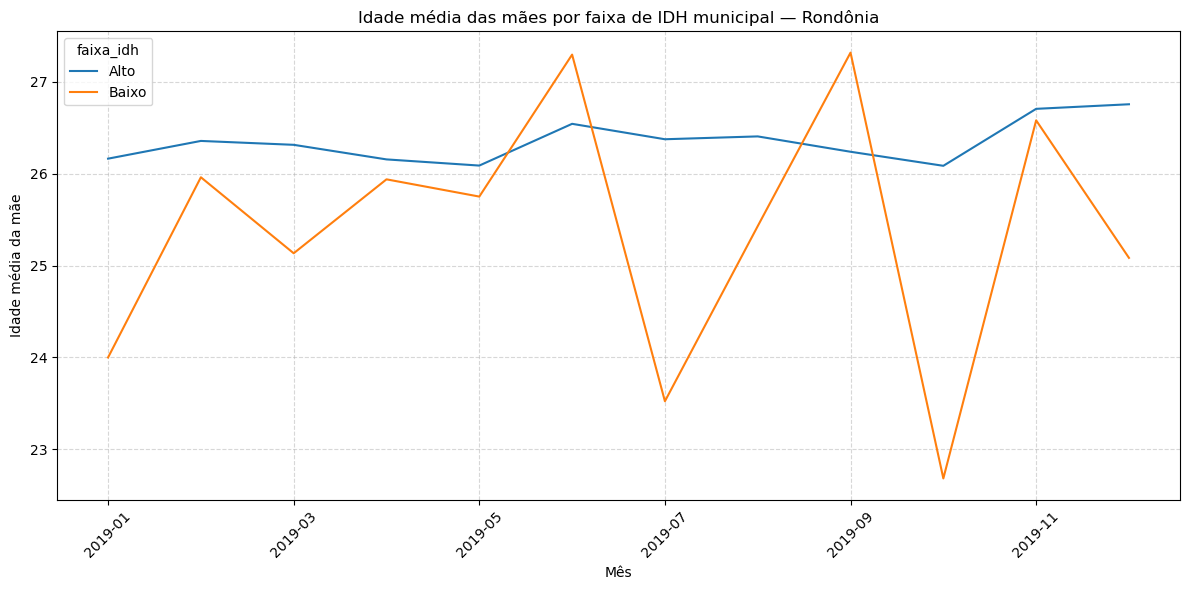

In [32]:
idh_dict = {
    "Porto Velho": 0.736,
    "Vilhena": 0.731,
    "Cacoal": 0.718,
    "Ji-Paraná": 0.714,
    "Pimenta Bueno": 0.710,
    # ... continue com TODOS os municípios de Rondônia conforme a tabela ...
    "Vale do Anari": 0.584,
    "Seringueiras": 0.598,
    # etc.
}

# --- 2. Função para classificar em faixa de IDH ---
def faixa_idh(idh):
    if idh >= 0.700:
        return "Alto"
    elif idh >= 0.600:
        return "Médio"
    else:
        return "Baixo"

# --- 3. Transformar em DataFrame de municípios + faixa ---
df_idh = pd.DataFrame([
    {"municipio": m, "idh": v, "faixa_idh": faixa_idh(v)}
    for m, v in idh_dict.items()
])

# --- 4.  DataFrame SINASC — garantir coluna do município com mesmo nome usado em idh_dict ---
COL_MUNICIPIO = "munResNome"
sinasc["municipio"] = sinasc[COL_MUNICIPIO]

# --- 5. merge SINASC ↔ df_idh para atribuir a faixa de IDH a cada nascimento ---
df = sinasc.merge(df_idh, how="left", left_on="municipio", right_on="municipio")

#  quantas entradas ficaram sem faixa (municípios faltantes)
print(df["faixa_idh"].isna().sum(), "registros sem faixa de IDH — verifique se todos municípios estão em idh_dict")

# --- 6. por mês (ou outra variável) + faixa_idh — exemplo: média idade mãe por faixa_idh ---
df["DTNASC"] = pd.to_datetime(df["DTNASC"], errors="coerce")
df = df.dropna(subset=["DTNASC"])
df["MES"] = df["DTNASC"].dt.to_period("M").astype(str)

media_por_idh = (
    df.groupby(["MES", "faixa_idh"])["IDADEMAE"]
    .mean()
    .reset_index()
    .pivot(index="MES", columns="faixa_idh", values="IDADEMAE")
)

print(media_por_idh.head())

import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
media_por_idh.plot(ax=plt.gca())
plt.title("Idade média das mães por faixa de IDH municipal — Rondônia")
plt.xlabel("Mês")
plt.ylabel("Idade média da mãe")
plt.grid(True, linestyle="--", alpha=0.5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 5.2 IFDM
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


Registros sem IFDM: 583
faixa_ifdm   Moderado    Regular
MES                             
2019-01     26.205882  25.150142
2019-02     26.282895  25.341176
2019-03     26.222927  25.577396
2019-04     26.219474  25.305882
2019-05     25.904736  25.089674


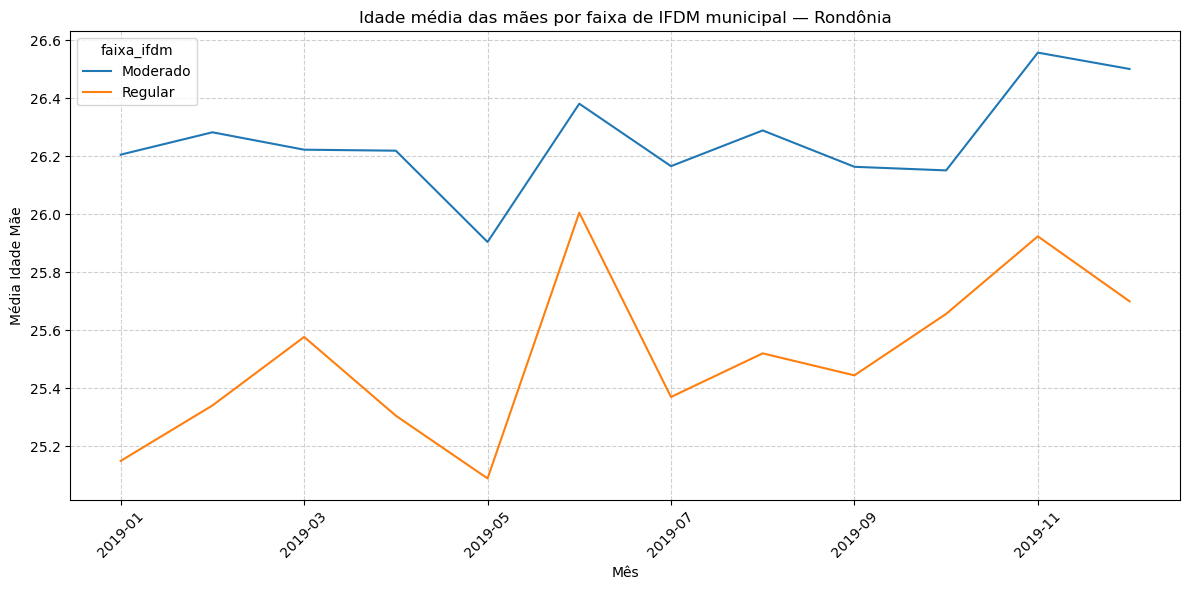

In [33]:
ifdm_dict = {
    "Ariquemes": 0.7746,
    "Vilhena": 0.7465,
    "Pimenta Bueno": 0.7383,
    "Porto Velho": 0.7257,
    "Ji-Paraná": 0.7117,
    "Cacoal": 0.7111,
    "Santa Luzia D'Oeste": 0.6850,
    "Rolim de Moura": 0.6785,
    "Chupinguaia": 0.6766,
    "São Miguel do Guaporé": 0.6699,
    "Pimenteiras do Oeste": 0.6501,
    "Teixeirópolis": 0.6500,
    "Colorado do Oeste": 0.6473,
    "Jaru": 0.6450,
    "Rio Crespo": 0.6430,
    "Primavera de Rondônia": 0.6384,
    "Alta Floresta D'Oeste": 0.6337,
    "Ouro Preto do Oeste": 0.6261,
    "São Francisco do Guaporé": 0.6214,
    "Candeias do Jamari": 0.6199,
    "São Felipe D'Oeste": 0.6153,
    "Presidente Médici": 0.6140,
    "Cerejeiras": 0.6137,
    "Monte Negro": 0.6016,
    "Urupá": 0.6006,
    # --- municípios com IFDM abaixo de 0.6 (faixa ‘Regular’) ---
    "Espigão D'Oeste": 0.5973,
    "Seringueiras": 0.5922,
    "Alvorada D'Oeste": 0.5919,
    "Itapuã do Oeste": 0.5903,
    "Cabixi": 0.5887,
    "Novo Horizonte do Oeste": 0.5858,
    "Nova Brasilândia D'Oeste": 0.5857,
    "Vale do Paraíso": 0.5818,
    "Corumbiara": 0.5759,
    "Alto Paraíso": 0.5735,
    "Cacaulândia": 0.5721,
    "Vale do Anari": 0.5710,
    "Ministro Andreazza": 0.5657,
    "Costa Marques": 0.5626,
    "Nova União": 0.5571,
    "Guajará-Mirim": 0.5541,
    "Mirante da Serra": 0.5519,
    "Parecis": 0.5502,
    "Castanheiras": 0.5430,
    "Theobroma": 0.5405,
    "Machadinho D'Oeste": 0.5322,
    "Campo Novo de Rondônia": 0.5272,
    "Nova Mamoré": 0.5084,
    "Cujubim": 0.5055,
    "Alto Alegre dos Parecis": 0.5046,
    "Governador Jorge Teixeira": 0.4562
    # (Se houver outros municípios, adicione aqui.)
}

# --- 2. Função para classificar faixa de IFDM ---
def faixa_ifdm(valor):
    if pd.isna(valor):
        return None
    if valor > 0.8:
        return "Alto"
    elif valor >= 0.6:
        return "Moderado"
    elif valor >= 0.4:
        return "Regular"
    else:
        return "Baixo"

# --- 3. Criar DataFrame ou Series de IFDM/fasixa por município ---
df_ifdm = pd.DataFrame([
    {"municipio": m, "ifdm": v, "faixa_ifdm": faixa_ifdm(v)}
    for m, v in ifdm_dict.items()
])

# --- 4. DataFrame de nascimentos (sinasc) — adicionar coluna ‘municipio’ com nome correto ---
sinasc["municipio"] = sinasc["munResNome"]

# --- 5. merge entre nascimentos e IFDM para atribuir faixa a cada nascimento ---
df = sinasc.merge(df_ifdm, how="left", left_on="municipio", right_on="municipio")

# quantos ficaram sem faixa — para ver se todos municípios coincidem
print("Registros sem IFDM:", df["faixa_ifdm"].isna().sum())

# --- 6. Criar mês e agrupar por faixa_ifdm 
df["DTNASC"] = pd.to_datetime(df["DTNASC"], errors='coerce')
df = df.dropna(subset=["DTNASC"])
df["MES"] = df["DTNASC"].dt.to_period("M").astype(str)

media_por_ifdm = (
    df.groupby(["MES", "faixa_ifdm"])["IDADEMAE"]
    .mean()
    .reset_index()
    .pivot(index="MES", columns="faixa_ifdm", values="IDADEMAE")
)

print(media_por_ifdm.head())

# --- 7. (Opcional) Plot — média idade mãe por faixa IFDM ao longo do tempo ---
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
media_por_ifdm.plot(ax=plt.gca())
plt.title("Idade média das mães por faixa de IFDM municipal — Rondônia")
plt.xlabel("Mês")
plt.ylabel("Média Idade Mãe")
plt.grid(True, linestyle="--", alpha=0.6)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


Registros sem PIB: 7413
faixa_pib       Alto  Muito Alto
MES                             
2019-01    26.194215   26.101295
2019-02    25.541176   26.285953
2019-03    26.447552   26.259970
2019-04    25.909722   26.195763
2019-05    25.350694   26.007663


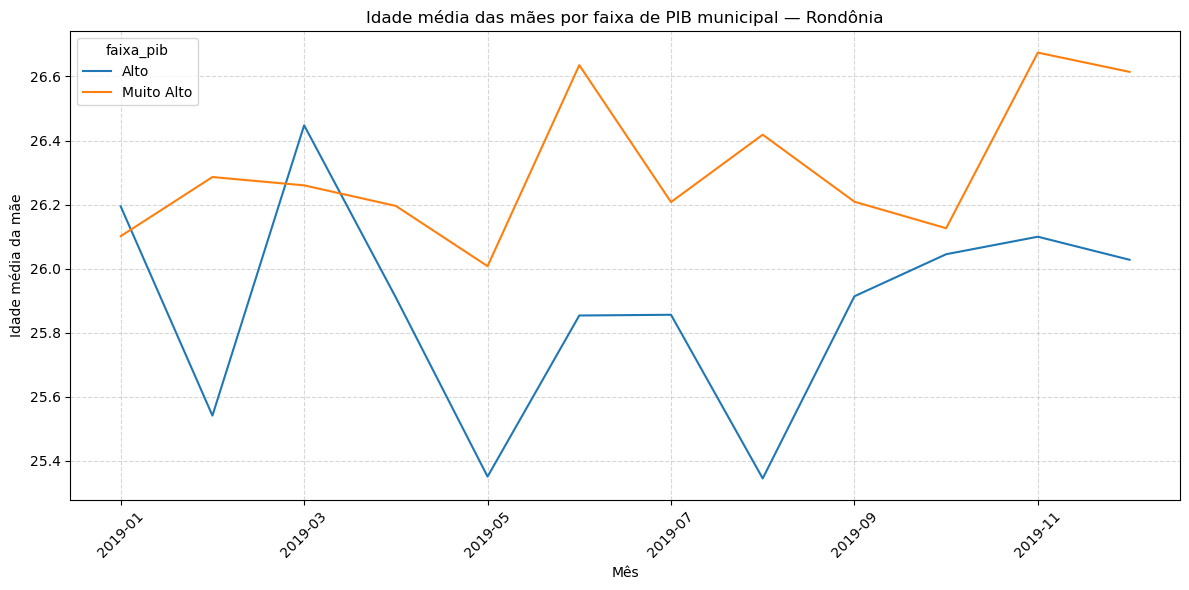

In [34]:
# --- 1. Dicionário com PIB por município conforme a lista da wiki ---
pib_dict = {
    "Porto Velho": 20059522, 
    "Ji-Paraná": 4231113,
    "Vilhena": 4215046,
    "Ariquemes": 3209761,
    "Cacoal": 2792383,
    "Jaru": 1765089,
    "Rolim de Moura": 1642516,
    "Pimenta Bueno": 1565194,
    "Guajará-Mirim": 1054179,
    # ... adicionar todos os municípios conforme a lista
    # demais municípios com PIB menor
}

# --- 2. Função para definir faixa de PIB ---
def faixa_pib(valor):
    if pd.isna(valor):
        return None
    # ajustar escala conforme unidade usada
    if valor >= 2000000:  
        return "Muito Alto"
    elif valor >= 1000000:
        return "Alto"
    elif valor >= 500000:
        return "Médio"
    else:
        return "Baixo"

# --- 3. DataFrame de PIB/faixa por município ---
df_pib = pd.DataFrame([
    {"municipio": m, "pib": v, "faixa_pib": faixa_pib(v)}
    for m, v in pib_dict.items()
])

# --- 4. dataset SINASC, garantir coluna de município 
sinasc["municipio"] = sinasc["munResNome"]

# --- 5. merge para atribuir a faixa de PIB a cada nascimento ---
df = sinasc.merge(df_pib, how="left", left_on="municipio", right_on="municipio")

print("Registros sem PIB:", df["faixa_pib"].isna().sum())

# --- 6. Criar mês e agrupar por faixa_pib  ---
df["DTNASC"] = pd.to_datetime(df["DTNASC"], errors="coerce")
df = df.dropna(subset=["DTNASC"])
df["MES"] = df["DTNASC"].dt.to_period("M").astype(str)

media_por_pib = (
    df.groupby(["MES", "faixa_pib"])["IDADEMAE"]
    .mean()
    .reset_index()
    .pivot(index="MES", columns="faixa_pib", values="IDADEMAE")
)

print(media_por_pib.head())

# --- 7. (Plotar gráfico ---
plt.figure(figsize=(12, 6))
media_por_pib.plot(ax=plt.gca())
plt.title("Idade média das mães por faixa de PIB municipal — Rondônia")
plt.xlabel("Mês")
plt.ylabel("Idade média da mãe")
plt.grid(True, linestyle="--", alpha=0.5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios com o PIB mais alto é a maior dentre todas.


A idade média das mães aumenta conforme o desenvolvimento econômico e social das regiões de Rondônia. Municípios com PIB e IDH mais altos apresentam mães mais velhas, indicando maternidade mais tardia associada a maior escolaridade, acesso à saúde e participação no mercado de trabalho. Já regiões menos desenvolvidas registram maternidade mais precoce, marcada por menor acesso a serviços e menor escolaridade média.
